# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `dataproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [ ]:
%pip install git+https://github.com/elben10/pydst
%pip install pandas-datareader
%pip install matplotlib-venn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib_venn import venn2
import pandas_datareader
import pydst
import dataproject
%load_ext autoreload
%autoreload 2

### 1 Introduction

From time to time articles appear in Danish media discussing the observed reductions in crime rates since the mid 90's. A possible confounder rarely discussed is the concurrent changes in the age structure of Danish society. Since the vast majority of violent('personfarlig') crime is commited by young men in the teens to the early twenties, this is potentially a serious confounder. In this short project, we examine how the age-corrected murder rate ('manddrab') has changed over time from 1980 to 2022. 

Why murder rate? Since both social and judicial definitions of violent crime have evolved over time, it is difficult to argue that increases in e.g. reported assaults or rapes directly reflect increases in objective incidence rates. Murder is in comparison a far more fixed entity, requiring a dead body and evidence of intentional homicide. 

Utilizing data from Danmarks Statistik on murder convictions and population age structure from 1980 to 2022, we compute age-specific murder rates for each year. We then find the specific age structure of the year 1980, expressed in fractions. These 1980 population age fractions are then scaled onto the age-specific murder rates in all years, producing the age-corrected murder rates that when summed for a given year reflect *what the murder rate would have been in a given year, had the population age structure in the given year been identical to the age structure of 1980*.  


### 2 Convictions as proxy for incidence

Given that we only have data on the characteristics of those convicted for murder, rather than on those that have perpetrated murder, there remains the issue of whether convictions are a sufficient proxy for incidence. Relevantly, since we are interested in the development over time of the murder rate, what could confound this development would lie in developments in the relationship between the conviction rate and the incidence rate, which would render the conviction rate a bad proxy for the incidence rate. As an example, police might have increased clearance rates over the period in question, which would bias results upwards (appearance of more murder over time). For this reason we plot the evolution in the number of murders minus the number of convictions for murder over the period in question.


2.1. Importing, exploring, cleaning data for murder incidence and convictions

In [3]:
Dst = pydst.Dst(lang='da') #Using API from Danmarks Statistik

#Extracting data on murder convictions
variables = {'KØN':['M','K'], 'ALDER':['*'], 'AFGØRELSE':['1','2','511','516','517','518'],'Tid':['*'], 'OVERTRÆD':['1230']} 
råstraf = Dst.get_data(table_id = 'STRAF40', variables=variables)
råstraf.sort_values(by=['KØN', 'ALDER', 'TID'], inplace=True)

straf_sum = råstraf.groupby(['ALDER', 'TID']).sum(numeric_only=1) #Summing all the pertinent (guilty) judicial rulings into one number for each year and age category
straf = pd.pivot_table(straf_sum, index = ['ALDER'], columns = ['TID']) #Pivoting table into a more useful format
straf2 = straf.convert_dtypes() #Converting object types to integers to save the world
straf3 = straf2.rename(columns={'INDHOLD':' Table 1 - Danish murder convictions by age category 1980-2022'})
display(straf3)

Table 1 - Danish murder convictions by age category 1980-2022  \
TID                                                                        1980   
ALDER                                                                             
15 år                                                          <NA>               
16 år                                                          <NA>               
17 år                                                          <NA>               
18 år                                                             1               
19 år                                                          <NA>               
20 år                                                          <NA>               
21 år                                                             2               
22 år                                                             1               
23 år                                                          <NA>               
24 år                                                             1               
25-29 år                                                          6               
30-39 år                                                          9               
40-49 år                                                          2               
50-59 år                                                          3               
60-69 år                                                          1               
70-79 år                                                          1               
80 år og derover                                               <NA>               
Alder i alt                                                      27               

                                                                        ...  \
TID               1981  1982  1983  1984  1985  1986  1987  1988  1989  ...   
ALDER                                                                   ...   
15 år             <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  ...   
16 år                1  <NA>     1     1  <NA>     1  <NA>  <NA>  <NA>  ...   
17 år                1  <NA>  <NA>  <NA>  <NA>  <NA>     1  <NA>  <NA>  ...   
18 år             <NA>  <NA>     1     1  <NA>     1  <NA>     1  <NA>  ...   
19 år                2     2     1     1  <NA>     2     2  <NA>     1  ...   
20 år                2     1     2  <NA>     2     1  <NA>     1  <NA>  ...   
21 år                2     2     1  <NA>  <NA>     2     1  <NA>  <NA>  ...   
22 år                1  <NA>     1  <NA>  <NA>     3  <NA>     3     1  ...   
23 år                4  <NA>     1  <NA>     1  <NA>     1     1     4  ...   
24 år             <NA>     2     2     2     2  <NA>     1     1     2  ...   
25-29 år             4     6    10     6     9     4    10     6     4  ...   
30-39 år             7    12     9    10     8    13     8    11    12  ...   
40-49 år             4     5     6     9     4    11     3     5     5  ...   
50-59 år             2     3     4     2     4     2     4     1     2  ...   
60-69 år             2  <NA>     1     2  <NA>     2     3  <NA>     1  ...   
70-79 år          <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  ...   
80 år og derover  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  ...   
Alder i alt         32    33    40    34    30    42    34    30    32  ...   

                                                                              
TID               2013  2014  2015  2016  2017  2018  2019  2020  2021  2022  
ALDER                                                                         
15 år             <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  
16 år             <NA>  <NA>     2     1  <NA>  <NA>  <NA>     1     1  <NA>  
17 år                2     1  <NA>     1  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  
18 år             <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>     1     1     1  
19 år                1  <NA>  <NA>     1  <NA>     1     1   

In [4]:
#Extracting data on murder incidence
variables2 = {'ANMSIGT':['ANM'],'OVERTRÆD':['1230'], 'Tid':['*']}
anmeldte = Dst.get_data(table_id = 'STRAF20', variables=variables2)
del anmeldte['OVERTRÆD']
del anmeldte['ANMSIGT']
anmeldte = anmeldte.rename(columns={"INDHOLD":"Antal"})
anmeldte = pd.pivot_table(anmeldte, columns='TID')
anmeldte.style.set_caption('Table 2 - Murder incidence by year, 1995-2022')


TID,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Antal,60,69,88,49,52,58,52,48,66,44,53,29,45,53,56,49,49,43,41,59,46,49,54,52,48,49,39,55


2.2 Visualizing the proxy relationship

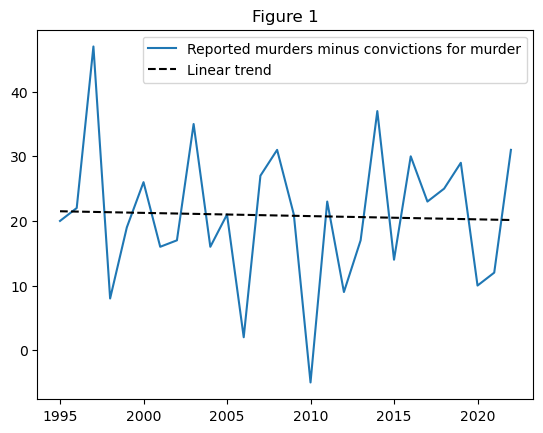

In [5]:
straf_proxy = straf2.loc['Alder i alt'] #Extracting the total conviction rate for each year
straf_proxy = straf_proxy.loc['INDHOLD', 1995:2022] #Limiting the data selection to the years 1995-2022 due to data limitations in the incidence rate
anmeldte_proxy = anmeldte.loc['Antal']

tid_proxy = range(1995,2023) #Creating the x-axis
stationaritet = (anmeldte_proxy-straf_proxy).astype(int) #the difference between convicted and incidence rate, forcing object type to integer 
z = np.polyfit(tid_proxy, stationaritet, 1) # fitting trend line
p = np.poly1d(z)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(tid_proxy, stationaritet, label='Reported murders minus convictions for murder')
ax.plot(tid_proxy, p(tid_proxy), color='black', linestyle='--', label='Linear trend')
plt.title('Figure 1')
plt.legend()
plt.show()

The relationship appears stationary, perhaps with a very slight downwards trend. Convictions seem to be a good proxy for incidence. 

### 3 Age-corrected murder rates

3.1 Importing, exploring, and cleaning data on population structure

In [6]:
#Selektion af værdier for variable 
variables_folk = {'KØN':['1','2'],'ALDER':['>=15'], 'Tid':['1980','1981','1982','1983','1984','1985','1986','1987','1988','1989','1990','1991', 
                                                           '1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003',
                                                           '2004','2005', '2006','2007','2008','2009','2010','2011','2012','2013','2014','2015',
                                                           '2016','2017','2018','2019','2020','2021','2022']}
befolkning = Dst.get_data(table_id = 'BEFOLK1', variables=variables_folk)
befolkning.sort_values(by=['KØN', 'ALDER', 'TID'], inplace=True)
del befolkning['CIVILSTAND']

#Sletter karakterer efter et mellemrum og gør variablen numerisk (15 år bliver til 15)
befolkning['ALDER'] = befolkning['ALDER'].apply(lambda x: int(x.split(' ')[0]))

#Laver aldersintervaller, der matcher datasættet straf2
def age_buckets(x):
    if x == 15: 
        return '15 år'
    elif x == 16:
        return '16 år'
    elif x == 17:
        return '17 år'
    elif x == 18:
        return '18 år'
    elif x == 19:
        return '19 år'
    elif x == 20:
        return '20 år'
    elif x == 21:
        return '21 år'
    elif x == 22:
        return '22 år'
    elif x == 23:
        return '23 år'
    elif x == 24:
        return '24 år'
    elif x > 24 and x < 30:
        return '25-29 år'
    elif x < 40: 
        return '30-39 år' 
    elif x < 50: 
        return '40-49 år' 
    elif x < 60: 
        return '50-59 år' 
    elif x < 70: 
        return '60-69 år' 
    elif x < 80: 
        return '70-79 år' 
    elif x >=80: 
        return '80 år og derover' 
    else: return 'other'
befolkning['aldersinterval'] = befolkning.ALDER.apply(lambda x: age_buckets(x))
del befolkning['ALDER']

bef_sum = befolkning.groupby(['aldersinterval', 'TID']).sum(numeric_only=1) #Summing over the variables we need

bef = pd.pivot_table(bef_sum, index = ['aldersinterval'], columns = ['TID']) #Pivoting into a more useful format

bef.columns = bef.columns.droplevel() #Dropping unneeded level header

samletalder = bef_sum.groupby(['TID']).sum(numeric_only=1) #Calculating aggregate population for each year
samletalder = pd.pivot_table(samletalder, columns = ['TID'])

newv = pd.concat([bef, samletalder], axis=0, join='inner') #Concatenating aggregate population to table
newv = newv.rename(index={'INDHOLD':'Alder i alt'})

newv.style.set_caption('Table 3 - Population structure 1980-2022')


TID,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
15 år,82114,84428,87253,80577,73967,71115,71062,75109,75463,71950,71760,72774,66316,63158,63449,60842,59381,55422,55325,53693,54857,57039,58695,59400,62290,64810,66934,67397,70522,70083,72546,72310,69887,69593,68174,68119,69127,67555,66614,67512,67768,67877,69009
16 år,81265,82317,84493,87333,80743,74189,71410,71374,75402,75693,72139,71982,72992,66604,63371,63674,61332,59661,55628,55612,53909,55092,57368,58961,59663,62451,64930,67088,67595,70993,70482,73020,72740,70278,70073,68822,68772,69839,68201,67142,67948,68246,68420
17 år,76616,81289,82329,84496,87411,80859,74424,71753,71565,75430,75748,72311,72171,73199,66806,63598,64133,61763,60017,56028,56001,54377,55660,57896,59431,60082,62823,65272,67450,68043,71164,70615,73204,72834,70507,70306,69287,69260,70115,68260,67304,68088,68469
18 år,75478,76817,81383,82488,84612,87606,81104,74925,72072,71691,75610,76025,72670,72701,73604,67087,64140,64551,62015,60266,56258,56166,54550,55763,57917,59419,60082,62838,65339,67633,68151,71376,70840,73491,73255,70973,71131,70008,69781,70566,68639,67674,68674
19 år,75330,75424,76532,81138,82224,84440,87401,81301,74846,71571,71373,75228,75683,72239,72247,73216,67118,64110,64472,61971,60308,56297,56279,54746,55793,57820,59444,60226,63357,66175,68585,69145,72454,72028,74737,74684,72647,72688,71269,70935,71623,69581,69151
20 år,73218,75333,75364,76568,81303,82523,84940,88033,81564,74744,71870,71740,75683,76205,72760,72756,73907,67713,64599,64867,62490,60651,56751,56808,55153,56229,58521,60343,61689,64794,67428,69776,70821,73946,73470,76210,76989,74572,74585,72820,72131,72666,71267
21 år,74043,73194,75281,75388,76709,81497,82968,85488,88291,81491,75061,72338,72327,76317,76924,73418,73744,74718,68402,65362,65704,63238,61593,57659,57655,56176,57324,59774,62081,63414,66525,68877,71793,72131,75528,74883,78470,78567,76294,75806,73901,72840,74538
22 år,74277,73846,73065,75254,75565,76871,81942,83526,85630,88133,81560,75440,72587,72811,76699,77293,74122,74244,75239,69094,66072,66342,63981,62319,58340,58419,57175,58392,61318,63704,64575,67544,70043,72597,73075,76460,76602,79900,79720,77306,76462,74517,74686
23 år,75190,74111,73732,73005,75258,75610,77430,82438,83640,85461,88189,81801,75791,72863,73188,76982,77911,74641,74748,75689,69520,66431,66898,64408,62695,58756,59098,58024,59737,62761,64683,65672,68614,71337,73849,74419,78420,78399,81298,80841,78029,77321,76345
24 år,75020,75084,74006,73661,72993,75366,76119,77932,82518,83640,85432,88366,82115,76128,73294,73442,77489,78451,74932,75063,76001,69752,66743,67195,64618,62961,59249,59722,58972,61022,63324,65590,66204,69614,72352,75068,76268,79884,79675,82217,81368,78560,78611


3.2 Calculating murder rate

In [7]:
mordrate = straf2.div(newv)*100000 #Mord pr 100.000 indbyggere
mordrate.style.set_caption('Table 4 - Murder convictions per capita 1980-2022')


3.3 Computing the age-corrected murder rate

In [20]:
alford = newv.loc[:,1980].div(newv.loc['Alder i alt', 1980]) #age distribution in the year of our lord 1980
display(alford)

mordrate2 = mordrate.mul(alford, axis=0)
mordrate2.drop(labels=['Alder i alt'], axis=0, inplace=True)
display(mordrate2)



15 år               0.020322
16 år               0.020112
17 år               0.018961
18 år               0.018680
19 år               0.018643
20 år               0.018120
21 år               0.018325
22 år               0.018383
23 år               0.018608
24 år               0.018566
25-29 år            0.092757
30-39 år            0.193111
40-49 år            0.140490
50-59 år            0.139684
60-69 år            0.124266
70-79 år            0.085759
80 år og derover    0.035213
Alder i alt         1.000000
Name: 1980, dtype: float64

INDHOLD                                                    \
TID                   1980      1981      1982      1983      1984      1985   
ALDER                                                                          
15 år                 <NA>      <NA>      <NA>      <NA>      <NA>      <NA>   
16 år                 <NA>  0.024432      <NA>  0.023029  0.024909      <NA>   
17 år                 <NA>  0.023326      <NA>      <NA>      <NA>      <NA>   
18 år             0.024749      <NA>      <NA>  0.022645  0.022077      <NA>   
19 år                 <NA>  0.049435   0.04872  0.022977  0.022674      <NA>   
20 år                 <NA>  0.048108  0.024044  0.047332      <NA>  0.043916   
21 år             0.049497  0.050071  0.048683  0.024307      <NA>      <NA>   
22 år             0.024749  0.024893      <NA>  0.024427      <NA>      <NA>   
23 år                 <NA>  0.100436      <NA>  0.025489      <NA>  0.024611   
24 år             0.024749      <NA>  0.050175   0.05041  0.050872   0.04927   
25-29 år          0.148492  0.099528   0.14909  0.249113  0.150311  0.225746   
30-39 år          0.222737  0.170724  0.290182  0.217497  0.242297   0.19619   
40-49 år          0.049497  0.097839   0.12037  0.140463   0.20345   0.08676   
50-59 år          0.074246  0.050452  0.076974  0.103566   0.05242  0.105746   
60-69 år          0.024749  0.049127      <NA>  0.024608  0.049338      <NA>   
70-79 år          0.024749      <NA>      <NA>      <NA>      <NA>      <NA>   
80 år og derover      <NA>      <NA>      <NA>      <NA>      <NA>      <NA>   

                                                          ...            \
TID                   1986      1987      1988      1989  ...      2013   
ALDER                                                     ...             
15 år                 <NA>      <NA>      <NA>      <NA>  ...      <NA>   
16 år             0.028164      <NA>      <NA>      <NA>  ...      <NA>   
17 år                 <NA>  0.026426      <NA>      <NA>  ...  0.052067   
18 år             0.023032      <NA>  0.025918      <NA>  ...      <NA>   
19 år             0.042661  0.045862      <NA>  0.026048  ...  0.025883   
20 år             0.021333      <NA>  0.022216      <NA>  ...      <NA>   
21 år             0.044173  0.021435      <NA>      <NA>  ...  0.025405   
22 år             0.067301      <NA>  0.064402  0.020858  ...      <NA>   
23 år                 <NA>  0.022573  0.022248  0.087097  ...      <NA>   
24 år                 <NA>  0.023824    0.0225  0.044396  ...      <NA>   
25-29 år          0.099556  0.247336  0.146942  0.096039  ...  0.143933   
30-39 år          0.323672  0.202617  0.282797  0.311354  ...  0.110344   
40-49 år          0.228163  0.059567  0.095868  0.093561  ...  0.172192   
50-59 år          0.053138  0.106355  0.026462   0.05258  ...  0.019194   
60-69 år          0.049499   0.07445      <NA>  0.025109  ...      <NA>   
70-79 år              <NA>      <NA>      <NA>      <NA>  ...      <NA>   
80 år og derover      <NA>      <NA>      <NA>      <NA>  ...      <NA>   

                                                                              \
TID                   2014      2015      2016      2017      2018      2019   
ALDER                                                                          
15 år                 <NA>      <NA>      <NA>      <NA>      <NA>      <NA>   
16 år                 <NA>  0.058446  0.029244      <NA>      <NA>      <NA>   
17 år             0.026893      <NA>  0.027366      <NA>      <NA>      <NA>   
18 år                 <NA>      <NA>      <NA>      <NA>      <NA>      <NA>   
19 år                 <NA>      <NA>  0.025663      <NA>  0.026159  0.026282   
20 år             0.073991      <NA>  0.023536      <NA>  0.024295      <NA>   
21 år             0.048524  0.024471      <NA>      <NA>  0.024018      <NA>   
22 år             0.025156      <NA>  0.047995  0.023007  0.023059      <NA>   
23 år             0.025198  0.025005 

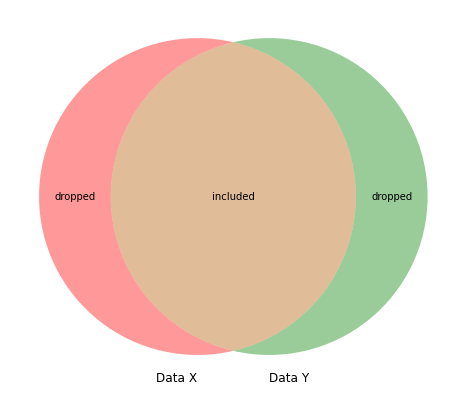

In [3]:
plt.figure(figsize=(15,7))
v = venn2(subsets = (4, 4, 10), set_labels = ('Data X', 'Data Y'))
v.get_label_by_id('100').set_text('dropped')
v.get_label_by_id('010').set_text('dropped' )
v.get_label_by_id('110').set_text('included')
plt.show()